In [ ]:
import tensorflow as tf
print(tf.__version__)

# Data

In [2]:
mnist = tf.keras.datasets.mnist

In [11]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

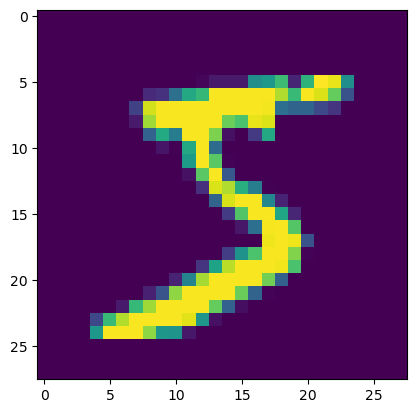

In [19]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [25]:
# from 0-255 to 0-1 (normalize)
training_images  = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Model

In [26]:
cv = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [27]:
cv.compile(optimizer = tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

cv.fit(training_images, training_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 1.1571 - acc: 0.7286
Epoch 2/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4824 - acc: 0.8743
Epoch 3/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.3799 - acc: 0.8952
Epoch 4/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3393 - acc: 0.9036
Epoch 5/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3167 - acc: 0.9096
Epoch 6/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3010 - acc: 0.9135
Epoch 7/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2890 - acc: 0.9170
Epoch 8/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2791 - acc: 0.9197
Epoch 9/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2697 - acc: 0.9222
Epoch 10/10
60000/60000 [==============================] - 8s 132us/

In [29]:
cv.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 154us/sample - loss: 0.2540 - acc: 0.9260


[0.2540285155504942, 0.926]

In [30]:
classifications = cv.predict(test_images)
print(classifications[0])

[5.90345990e-05 6.52967502e-09 4.78762995e-05 1.57850829e-03
 1.97088212e-07 5.28057535e-05 3.80929011e-10 9.97559547e-01
 1.38328905e-05 6.88234577e-04]


In [32]:
print(test_labels[0])
print(classifications[0][7])

7
0.99755955
